In [17]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode
import emcee

import pandas as pd
import corner

import os
import os.path as path
import wget

In [19]:
if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/Gaussiana.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'
#url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/Likelihood.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file
    
data = pd.read_csv(Path_)
X = data.x

In [4]:
def LogPrior(p):
    u,s = p
    if 3 <= u <= 5. and 0.5 <= s <= 3.5:
        return 0.
    else:
        return -np.inf

In [5]:
def Gauss(p,x):
    
    mu, sigma = p
    
    return np.exp( -0.5*(x-mu)**2/sigma**2  )/np.sqrt(2*np.pi*sigma**2)

In [6]:
def Likelihood(p,x):
    return Gauss(p,x)

In [7]:
def JointLikelihood(p,x):
    return np.sum( np.log(Likelihood(p,x)) )

In [8]:
def LogPosterior(p,x):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLikelihood(p,x) + LogP

In [9]:
p0 = np.zeros((5,2))
p0[:,0] = 2.
p0[:,1] = 2.
p0 += np.random.rand(5,2)
p0

array([[2.09356752, 2.70291913],
       [2.92648125, 2.90668607],
       [2.46158606, 2.5971417 ],
       [2.8431386 , 2.34552444],
       [2.9342382 , 2.68128512]])

In [20]:
sampler = emcee.EnsembleSampler(5,2,LogPosterior,args=[X])

In [21]:
pos,prob,state = sampler.run_mcmc(p0,1000,progress=True)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\marga\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.08it/s]


In [37]:
samples = sampler.get_chain()
len(samples)

1000

In [39]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
truths

array([4.03833836, 1.83471095])

<IPython.core.display.Javascript object>


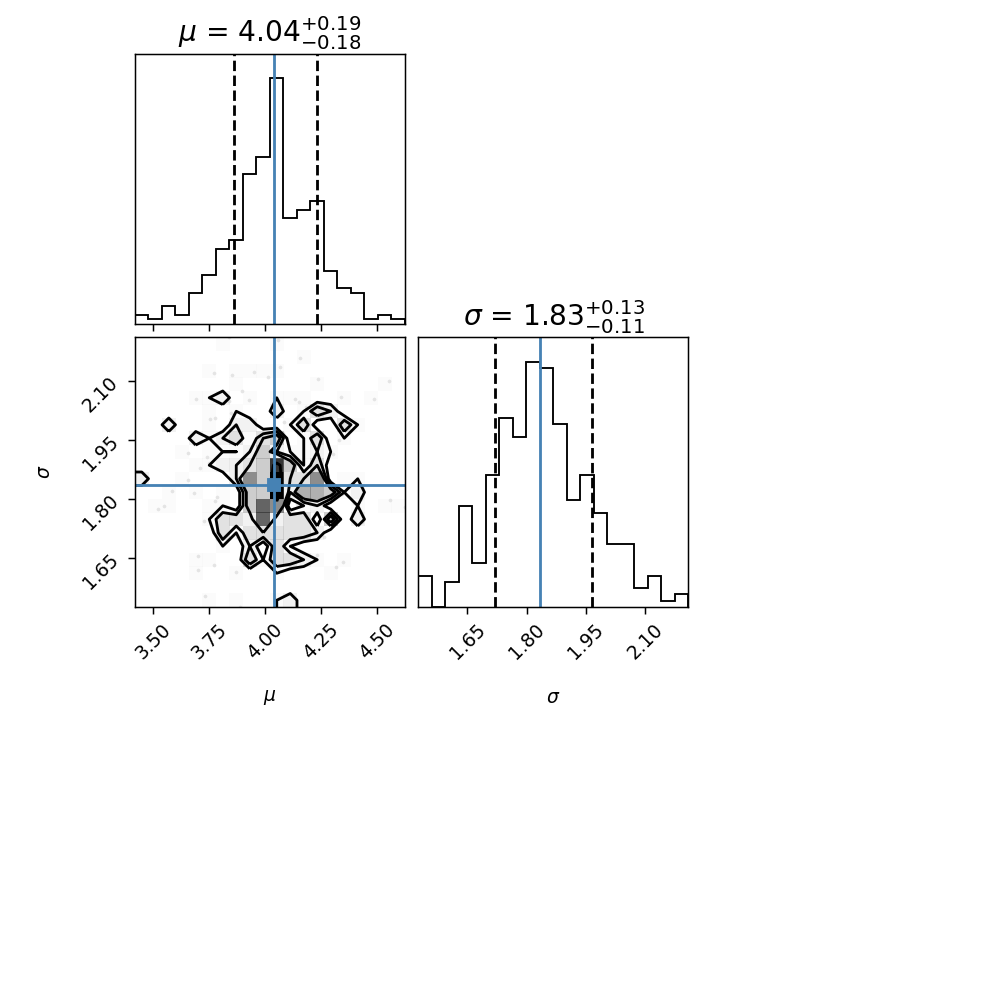

In [40]:
labels = ["$\mu$","$\sigma$"]
figure = corner.corner(flat_samples, 
                       truths=truths, 
                       labels=labels, 
                       quantiles=[0.16,0.84], 
                       show_titles=True,
                       title_kwargs={"fontsize":15})